In [2291]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2292]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

########
filename='/content/drive/MyDrive/Colab Notebooks/ug_thesis/true_fake.xlsx'
data=pd.read_excel(filename)
data.head()

###just for  checking datasets
myself=pd.read_excel(filename)


In [2293]:
data.shape


(834, 19)

In [2294]:
###check for any null have or not
data.isnull().sum()

object_id              0
name                   0
id                     0
type                   0
url                    0
comments_count         0
shares_count           0
reactions_count        0
like_count             0
love_count             0
wow_count              0
haha_count             0
sad_count              0
angry_count            0
about                  0
category               0
fan_count              0
talking_about_count    0
label                  0
dtype: int64

In [2295]:
#data.tail(5)

In [2296]:
###To know data type names

data.dtypes

object_id              object
name                   object
id                      int64
type                   object
url                    object
comments_count          int64
shares_count            int64
reactions_count         int64
like_count              int64
love_count              int64
wow_count               int64
haha_count              int64
sad_count               int64
angry_count             int64
about                  object
category               object
fan_count               int64
talking_about_count     int64
label                    bool
dtype: object

In [2297]:
###check column name
data.columns

Index(['object_id', 'name', 'id', 'type', 'url', 'comments_count',
       'shares_count', 'reactions_count', 'like_count', 'love_count',
       'wow_count', 'haha_count', 'sad_count', 'angry_count', 'about',
       'category', 'fan_count', 'talking_about_count', 'label'],
      dtype='object')

In [2298]:
###check column all unique category
data.label.unique()

array([False,  True])

In [2299]:
data.tail(5)

,object_id,name,id,type,url,comments_count,shares_count,reactions_count,like_count,love_count,wow_count,haha_count,sad_count,angry_count,about,category,fan_count,talking_about_count,label
829,922893371213515_1732674116902099,Doug Mastriano Fighting for Freedom,923000000000000,album,https://www.facebook.com/922893371213515/posts...,33,595,684,560,111,2,10,0,1,this is my personal page and not affiliated wi...,Public figure,89141,14411,False
830,954553357996147_3405450079573117,Elizabeth Johnston,955000000000000,photo,https://www.facebook.com/elizabethjohnstonmini...,1275,7981,19370,13503,2169,3192,244,39,223,In love w/ Jesus | Mother of 10 amazing childr...,Interest,702268,841330,False
831,966291083503501_1948572038608729,Anonymous Luxembourg - AnonLiberty,966000000000000,share,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,846,2919,5310,800,9,887,25,120,3469,This page represents the idea Anonymous. Pleas...,Community,1012,8,False
832,971455552907988_3050409005012622,Talibah Begay,971000000000000,photo,https://www.facebook.com/971455552907988/photo...,70,1289,110,77,3,18,12,0,0,Ya'at'eeh (Hello) Welcome to my official page!...,Musician,25758,1659,False
833,995139390571735_3203001686452150,The DMV Daily,995000000000000,photo,https://www.facebook.com/thedmvdaily/photos/a....,20,76,27,14,0,6,6,0,1,No info,News & media website,10278,38714,False


In [2300]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
##It's Just for checking loops
# Finding column names
for x in data.columns:
    print(x)
    print(type(x))
    break

object_id
<class 'str'>


## **Label enconding applied to the object or string data column**


In [2301]:

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

#label encoding on specific column
for x in data.columns:
    if x=='object_id' or x=='name'or x=='type'or x=='url'or x=='about'or x=='category'or x=='label':
      data[x]=le.fit_transform(data[x])


In [2302]:
###After encoded
data.tail(5)

,object_id,name,id,type,url,comments_count,shares_count,reactions_count,like_count,love_count,wow_count,haha_count,sad_count,angry_count,about,category,fan_count,talking_about_count,label
829,794,60,923000000000000,2,538,33,595,684,560,111,2,10,0,1,191,42,89141,14411,0
830,795,64,955000000000000,3,755,1275,7981,19370,13503,2169,3192,244,39,223,70,22,702268,841330,0
831,796,16,966000000000000,5,298,846,2919,5310,800,9,887,25,120,3469,152,8,1012,8,0
832,797,166,971000000000000,3,539,70,1289,110,77,3,18,12,0,0,184,29,25758,1659,0
833,798,172,995000000000000,3,803,20,76,27,14,0,6,6,0,1,92,31,10278,38714,0


In [2303]:
data.label.unique()

array([0, 1])

In [2304]:
data.dtypes

object_id              int64
name                   int64
id                     int64
type                   int64
url                    int64
comments_count         int64
shares_count           int64
reactions_count        int64
like_count             int64
love_count             int64
wow_count              int64
haha_count             int64
sad_count              int64
angry_count            int64
about                  int64
category               int64
fan_count              int64
talking_about_count    int64
label                  int64
dtype: object

In [2305]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2306]:
###check column name
data.columns

Index(['object_id', 'name', 'id', 'type', 'url', 'comments_count',
       'shares_count', 'reactions_count', 'like_count', 'love_count',
       'wow_count', 'haha_count', 'sad_count', 'angry_count', 'about',
       'category', 'fan_count', 'talking_about_count', 'label'],
      dtype='object')

In [2307]:
# ##check column all unique category
data.label.unique()

array([0, 1])

### **Data split Feature and Target**

In [2308]:
#split dataset in features and target variable
feature_cols = ['object_id', 'name', 'id', 'type', 'url', 'comments_count',
       'shares_count', 'reactions_count', 'like_count', 'love_count',
       'wow_count', 'haha_count', 'sad_count', 'angry_count', 'about',
       'category', 'fan_count', 'talking_about_count']
X = data[feature_cols] # Features
y = data.label # Target variable
### y=data.pop('label')
### X=data

##Dataset split into train and test set

In [2309]:
# Split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # 70% training and 30% test

#1.Applying the Decision Tree classifier (DT)

In [2310]:
# DT classifer object
clf = DecisionTreeClassifier()

# Train the DT Classifer
clf = clf.fit(X_train,y_train)

#Predict for test dataset
y_pred = clf.predict(X_test)

In [2311]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.crosstab(y_test,y_pred)


Accuracy: 0.9601593625498008


col_0,0,1
label,,
0,55,10
1,0,186


In [2312]:
dt_probs = clf.predict_proba(X_test)

**Confusion_matrix:Decision tree**

In [2313]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test, y_pred)

array([[ 55,  10],
       [  0, 186]])

In [2314]:
clf.classes_

array([0, 1])

In [2315]:
confusion_matrix(y_test, y_pred,labels=(0,1))

array([[ 55,  10],
       [  0, 186]])

In [2316]:

confusion_matrix(y_test, y_pred, labels=(0,1)).ravel()

array([ 55,  10,   0, 186])

In [2317]:
confusion_matrix(y_test, y_pred, labels=(0,1)).ravel()
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred, labels=(0,1)).ravel()
precision = tp/(tp+fp)
precision

0.9489795918367347

In [2318]:
tn, fp, fn, tp

(55, 10, 0, 186)

In [2319]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

0.9601593625498008

In [2320]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        65
           1       0.95      1.00      0.97       186

    accuracy                           0.96       251
   macro avg       0.97      0.92      0.95       251
weighted avg       0.96      0.96      0.96       251



In [2321]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresold=precision_recall_curve(y_test,y_pred)

In [2322]:
precision

array([0.94897959, 1.        ])

In [2323]:
recall

array([1., 0.])

In [2324]:
thresold

array([1])

### **Visualizing Decision Trees**

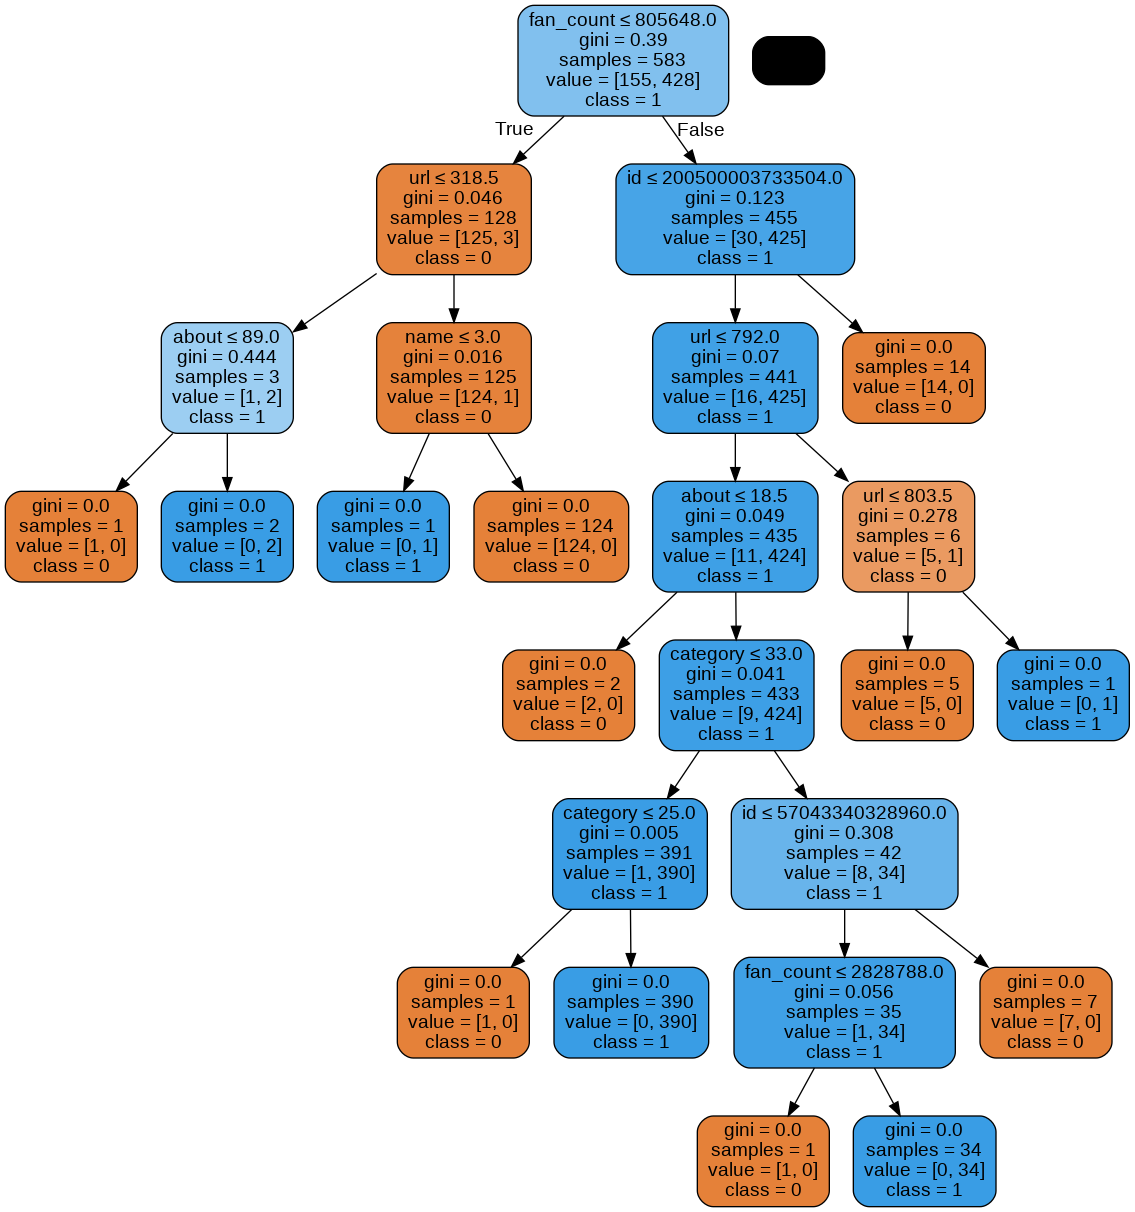

In [2325]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### **Optimizing Decision Tree Performance**

In [2326]:
# DT object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train DT
clf = clf.fit(X_train,y_train)

#Predict the label for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

pd.crosstab(y_test,y_pred)

Accuracy: 0.952191235059761


col_0,0,1
label,,
0,53,12
1,0,186


Visualizing Optimized Decision Trees

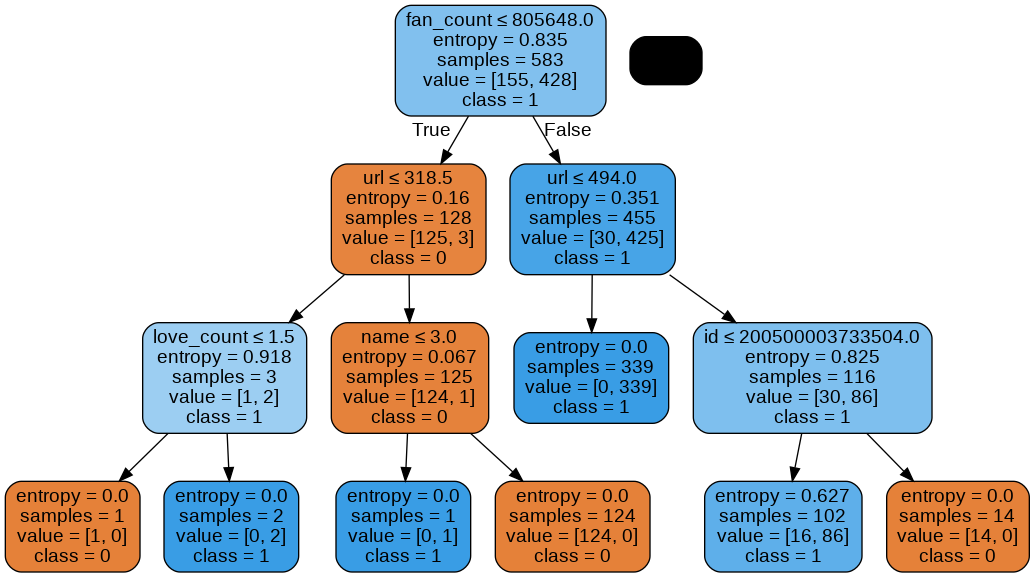

In [2327]:
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#2.Applying Gaussian Classifier

In [2328]:
from sklearn.naive_bayes import GaussianNB

#Creating Gaussian Classifier
model_nb = GaussianNB()

#Train the model by using the training sets
model_nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model_nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

pd.crosstab(y_test,y_pred)

Accuracy: 0.852589641434263


col_0,0,1
label,,
0,28,37
1,0,186


**Roc_AUC**

# **Confusion_matrix_GNB**

In [2329]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test, y_pred)


array([[ 28,  37],
       [  0, 186]])

In [2330]:
model_nb.classes_

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


array([0, 1])

In [2331]:
confusion_matrix(y_test, y_pred,labels=(0,1))

array([[ 28,  37],
       [  0, 186]])

In [2332]:
confusion_matrix(y_test, y_pred, labels=(0,1)).ravel()

array([ 28,  37,   0, 186])

In [2333]:

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=(0,1)).ravel()


In [2334]:
tn, fp, fn, tp

(28, 37, 0, 186)

In [2335]:
accuracy=(tp+tn)/(tp+tn+fp+fn)

In [2336]:
accuracy

0.852589641434263

In [2337]:
precision = tp/(tp+fp)
precision

0.8340807174887892

In [2338]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        65
           1       0.83      1.00      0.91       186

    accuracy                           0.85       251
   macro avg       0.92      0.72      0.76       251
weighted avg       0.88      0.85      0.83       251



In [2339]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresold=precision_recall_curve(y_test,y_pred)

In [2340]:
precision

array([0.83408072, 1.        ])

In [2341]:
recall

array([1., 0.])

In [2342]:
thresold

array([1])

## **3.Support vector machines (SVMs)1**

In [2343]:
#Import svm model
from sklearn import svm

In [2344]:
############Create svm Classifier
clf_svm = svm.SVC(probability=True) 

In [2345]:
clf_svm.fit(X_train, y_train)

SVC(probability=True)

In [2346]:
y_pred = clf_svm.predict(X_test)

In [2347]:
svm_probs=clf_svm.predict_proba(X_test)

In [2348]:
#scikit-learn metrics module for accuracy 
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.crosstab(y_test,y_pred)

Accuracy: 0.8764940239043825


col_0,0,1
label,,
0,34,31
1,0,186


In [2349]:
# Model Accuracy
clf_svm.score(X_test, y_test)


0.8764940239043825

In [2350]:
# model.predict([[3, 5, 4, 2,4,3,2,1,2,1,2,3,2,1,12,1,5,777]])

In [2351]:
# Tuning parameters
# Regularization (C)
model_C = svm.SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)


0.8764940239043825

In [2352]:
# Regularization (C)
model_C = svm.SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.8924302788844621

In [2353]:
# 2. Gamma
model_g = svm.SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.7410358565737052

In [2354]:
# 3. Kernel

model_linear_kernal = svm.SVC(kernel='poly')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='poly')

In [2355]:
model_linear_kernal.score(X_test, y_test)

0.8127490039840638

# Confusion Matrix of SVMs1

In [2356]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=y_pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=y_pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=y_pred))



acuracy: 0.8764940239043825
precision: 0.8571428571428571
recall 1.0


In [2357]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.52      0.69        65
           1       0.86      1.00      0.92       186

    accuracy                           0.88       251
   macro avg       0.93      0.76      0.80       251
weighted avg       0.89      0.88      0.86       251



#4.Here **10-fold Cross validation**..


**K(10) fold cross validation** applied

In [2358]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
########
folds=KFold(10)


In [2359]:

from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier()
result1=cross_val_score(model1,X,y,cv=folds)
print(result1)
print(np.mean(result1))


[0.97619048 1.         0.8452381  0.96428571 0.97590361 0.96385542
 0.97590361 0.98795181 0.98795181 0.6626506 ]
0.9339931153184164


In [2360]:
# #DecisionTree
scr=[]
for i in result1:
  scr.append(i)

fold_10 = {'Fold': [1,2,3,4,5,6,7,8,9,10],
            'cross_val_score': scr
          }
df = pd.DataFrame(fold_10, columns = ['Fold', 'cross_val_score'])
print (df)

   Fold  cross_val_score
0     1         0.976190
1     2         1.000000
2     3         0.845238
3     4         0.964286
4     5         0.975904
5     6         0.963855
6     7         0.975904
7     8         0.987952
8     9         0.987952
9    10         0.662651


In [2361]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
result2=cross_val_score(model2,X,y,cv=folds)
print(result2)

print(np.mean(result2))

[0.61904762 1.         0.75       0.85714286 0.92771084 0.69879518
 0.72289157 0.97590361 0.98795181 0.97590361]
0.85153471026965


In [2362]:
##GaussianNB
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
result2=cross_val_score(model2,X,y,cv=folds)
scr=[]
for i in result2:
  scr.append(i)

fold_10 = {'Fold': [1,2,3,4,5,6,7,8,9,10],
            'cross_val_score': scr
          }
df = pd.DataFrame(fold_10, columns = ['Fold', 'cross_val_score'])
print (df)


   Fold  cross_val_score
0     1         0.619048
1     2         1.000000
2     3         0.750000
3     4         0.857143
4     5         0.927711
5     6         0.698795
6     7         0.722892
7     8         0.975904
8     9         0.987952
9    10         0.975904


In [2363]:
from sklearn.svm import SVC

model3=SVC()
result3=cross_val_score(model3,X,y,cv=folds)
print(result3)

print(np.mean(result3))


[0.61904762 1.         0.75       0.85714286 0.92771084 0.69879518
 0.4939759  0.97590361 0.98795181 0.97590361]
0.8286431440045898


In [2364]:
##SVC
scr=[]
for i in result3:
  scr.append(i)

fold_10 = {'Fold': [1,2,3,4,5,6,7,8,9,10],
            'cross_val_score': scr
          }
df = pd.DataFrame(fold_10, columns = ['Fold', 'cross_val_score'])
print (df)

   Fold  cross_val_score
0     1         0.619048
1     2         1.000000
2     3         0.750000
3     4         0.857143
4     5         0.927711
5     6         0.698795
6     7         0.493976
7     8         0.975904
8     9         0.987952
9    10         0.975904


# **5.Roc_Auc**
A receiver operating characteristic curve, or ROC curve

AUROC is the area under the ROC curve

In [2365]:
# DT
dt_probs = clf.predict_proba(X_test)
# GNB
nb_probs = model_nb.predict_proba(X_test)
# SVM
svm_probs=clf_svm.predict_proba(X_test)

**Individually classifier is applied for ROC AND AUROC**

In [2366]:
# Threshold is 0.3
y_predict_t3 = np.where(dt_probs[:,1]>0.3,1,0) 

In [2367]:
pd.crosstab(y_test,y_predict_t3)

col_0,0,1
label,,
0,53,12
1,0,186


In [2368]:
def predictThreshold(model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) 

In [2369]:
# Thresold values for DT classifier
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predictThreshold(clf,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[ 53  12]
 [  0 186]]
Threshold : 0.1
[[ 53  12]
 [  0 186]]
Threshold : 0.2
[[ 53  12]
 [  0 186]]
Threshold : 0.30000000000000004
[[ 53  12]
 [  0 186]]
Threshold : 0.4
[[ 53  12]
 [  0 186]]
Threshold : 0.5
[[ 53  12]
 [  0 186]]
Threshold : 0.6000000000000001
[[ 53  12]
 [  0 186]]
Threshold : 0.7000000000000001
[[ 53  12]
 [  0 186]]
Threshold : 0.8
[[ 53  12]
 [  0 186]]
Threshold : 0.9
[[ 57   8]
 [ 42 144]]


In [2370]:
# Thresold values for GNB classifier
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predictThreshold(model_nb,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0  65]
 [  0 186]]
Threshold : 0.1
[[ 21  44]
 [  0 186]]
Threshold : 0.2
[[ 22  43]
 [  0 186]]
Threshold : 0.30000000000000004
[[ 27  38]
 [  0 186]]
Threshold : 0.4
[[ 27  38]
 [  0 186]]
Threshold : 0.5
[[ 28  37]
 [  0 186]]
Threshold : 0.6000000000000001
[[ 31  34]
 [  0 186]]
Threshold : 0.7000000000000001
[[ 33  32]
 [  0 186]]
Threshold : 0.8
[[ 34  31]
 [  0 186]]
Threshold : 0.9
[[ 41  24]
 [  7 179]]


In [2371]:
# Thresold values for SVM classifier
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predictThreshold(clf_svm,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0  65]
 [  0 186]]
Threshold : 0.1
[[ 33  32]
 [  0 186]]
Threshold : 0.2
[[ 34  31]
 [  0 186]]
Threshold : 0.30000000000000004
[[ 34  31]
 [  0 186]]
Threshold : 0.4
[[ 35  30]
 [  0 186]]
Threshold : 0.5
[[ 38  27]
 [  0 186]]
Threshold : 0.6000000000000001
[[ 38  27]
 [  0 186]]
Threshold : 0.7000000000000001
[[ 41  24]
 [  7 179]]
Threshold : 0.8
[[ 44  21]
 [ 27 159]]
Threshold : 0.9
[[ 65   0]
 [186   0]]


In [2372]:
from sklearn.metrics import roc_curve, roc_auc_score

In [2373]:
tpr,fpr,thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])

In [2374]:
thresholds

array([2.        , 1.        , 0.84313725, 0.        ])

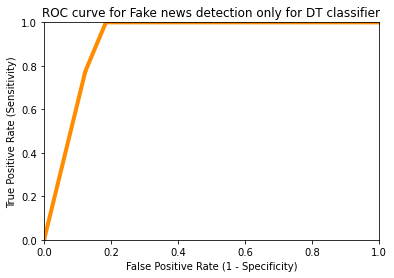

In [2375]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fake news detection only for DT classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, marker='.', color='darkorange',lw=4)
plt.show()


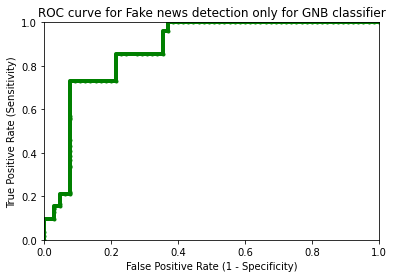

In [2376]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model_nb.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fake news detection only for GNB classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, marker='.', color='green',lw=4)
plt.show()

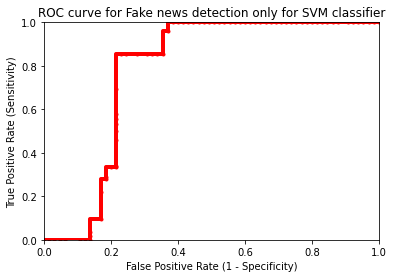

In [2377]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, clf_svm.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fake news detection only for SVM classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, marker='.', color='red',lw=4)
plt.show()

In [2378]:
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test, model_nb.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test, clf_svm.predict_proba(X_test)[:,1]))

0.9176178660049628
0.8770057899090158
0.7814722911497105


**With combined DT,GNB,SVM for ROC,AUROC**

In [2379]:
# **Probabilities for the positive outcome is kept.**
r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_probs[:,1]
nb_probs = nb_probs[:, 1]
svm_probs=svm_probs[:,1]


In [2380]:
# Computing AUROC and ROC curve values
from sklearn.metrics import roc_curve, roc_auc_score

In [2381]:
r_auc =  roc_auc_score(y_test, r_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc= roc_auc_score(y_test, svm_probs)

In [2382]:
# Printing the AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decusion Tree: AUROC = %.3f' % (dt_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Support Vector Machine: AUROC = %.3f' % (svm_auc))

Random (chance) Prediction: AUROC = 0.500
Decusion Tree: AUROC = 0.918
Naive Bayes: AUROC = 0.877
Support Vector Machine: AUROC = 0.781


In [2383]:
# Calculating the ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

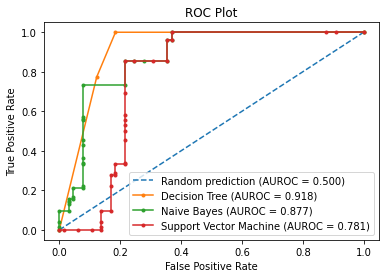

In [2384]:
# Ploting the ROC curve
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()

Reference✅

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


In [2385]:
###End of file